- **Name** : Norhan Reda Abd Elwahed Ahmed
- **sec** : 2
- **BN** : 31
- **code** : 9203639

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import mode
import matplotlib.pyplot as plt

In [2]:
# load the dataset using pandas
df = pd.read_excel("Concrete_Data.xlsx")

In [3]:
# split the dataframe into a training and testing splits with a 70% / 30% ratio
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42) # Random is fixed for reproducability

In [4]:
df_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
196,194.68,0.0,100.52,165.62,7.48,1006.4,905.90,28,25.724350
631,325.00,0.0,0.00,184.00,0.00,1063.0,783.00,7,17.540269
81,318.80,212.5,0.00,155.70,14.30,852.1,880.40,3,25.200348
526,359.00,19.0,141.00,154.00,10.91,942.0,801.00,3,23.639177
830,162.00,190.0,148.00,179.00,19.00,838.0,741.00,28,33.756745
...,...,...,...,...,...,...,...,...,...
87,286.30,200.9,0.00,144.70,11.20,1004.6,803.70,3,24.400556
330,246.83,0.0,125.08,143.30,11.99,1086.8,800.89,14,42.216615
466,190.34,0.0,125.18,166.61,9.88,1079.0,798.90,100,33.563692
121,475.00,118.8,0.00,181.10,8.90,852.1,781.50,28,68.299493


In [5]:
df_train.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,284.409681,74.971886,52.006588,181.805576,6.125337,973.798128,771.636297,46.049931,36.152573
std,108.361334,87.717335,63.707358,21.159956,6.046367,78.509208,80.125492,61.650743,16.803402
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.000000,0.000000,0.000000,165.620000,0.000000,932.000000,724.300000,14.000000,23.890343
50%,277.000000,22.000000,0.000000,185.700000,6.000000,968.000000,778.450000,28.000000,35.076402
75%,362.600000,145.000000,117.540000,192.000000,10.100000,1040.000000,821.000000,56.000000,46.247292
max,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [6]:
# extract the models input and targets from both the training and testing dataframes
def extract_Xy(df):
    df_numpy = df.to_numpy()
    return df_numpy[:, :-1], df_numpy[:, -1]

X_train, y_train = extract_Xy(df_train)
X_test, y_test = extract_Xy(df_test)

y_median = np.median(y_train)
print("Median value of the target:", y_median)

# Since we will treat this as a classification task, we will assume that
# the concrete is "strong" (y = True) if its compressive ratio is higher than the median
# otherwise, it is assumed to be "weak" (y = False)
y_train = y_train > y_median
y_test = y_test > y_median

# Now ~50% of the samples should be considered "strong" and the rest are considered "weak"
print(f"Percentage of 'strong' samples: {y_train.mean() * 100} %")

# Also, lets standardize the data since it improves the training process
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train = (X_train - X_mean)/(1e-8 + X_std)
X_test = (X_test - X_mean)/(1e-8 + X_std)

Median value of the target: 35.076402024
Percentage of 'strong' samples: 49.930651872399444 %


## Bagging from Scratch

In [7]:
class GenericBagging:

    def __init__(self, n_estimators):
        self.n_estimators = n_estimators
        self.estimators = []
        self.initialize_estimators()
        
    def initialize_estimators(self):
        # initialize the given number of estimators
        for _ in range(self.n_estimators):
            # Don't change the decision tree parameters
            self.estimators.append(DecisionTreeClassifier(max_depth=5, random_state=0))

    def generate_data_subset(self,X,Y):
        # TODO: Generate bootstrap samples (with replacement)
        # Use a subset size of 300 samples
        # pass
        indices = np.random.choice(X.shape[0], size=300, replace=True)
        X_subset = X[indices]
        Y_subset = Y[indices]
        return X_subset, Y_subset
        

    def fit(self, X, Y):
        # TODO: loop over each classifier and fit on random data subset
        # pass
        for estimator in self.estimators:
            X_subset, Y_subset = self.generate_data_subset(X, Y)
            estimator.fit(X_subset, Y_subset)

    def predict(self, X):
        # TODO: implement prediction function using majority vote
        # pass
        predictions = np.zeros((X.shape[0], len(self.estimators)))
        for i, estimator in enumerate(self.estimators):
            predictions[:, i] = estimator.predict(X)
        majority = mode(predictions, axis=1)[0].flatten()
        return majority
    
    def calculate_oob_error(self, X, Y):
        # TODO: calculate Out-of-Bag error
        # The out-of-bag (OOB) error is the average error for each training observation
        # calculated using predictions from the trees that do not contain this training observation
        # in their respective bootstrap sample. 
        # pass
        oob_errors = []
        for i, estimator in enumerate(self.estimators):
            indices = np.arange(X.shape[0])
            mask = np.zeros(X.shape[0], dtype=bool)
            mask[self.generate_data_subset(X, Y)[0].astype(int)] = True
            indices_oob = indices[~mask]
            if len(indices_oob) > 0:
                X_oob = X[indices_oob]
                Y_oob = Y[indices_oob]
                oob_prediction = estimator.predict(X_oob)
                oob_error = 1 - np.mean(oob_prediction == Y_oob)
                oob_errors.append(oob_error)
        return np.mean(oob_errors)

In [8]:
def get_scores(n_estimators):
    # run model bagging and compute OOB error and test accuracy
    model = GenericBagging(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_test_predict = model.predict(X_test)
    return model.calculate_oob_error(X_train, y_train), accuracy_score(y_test, y_test_predict)

In [9]:
def run_bagging():
    n_estimators_options = [5, 10, 50, 100, 200, 500]
    oob_errors = []
    test_accuracies = []
    for n_estimators in n_estimators_options:
        oob_error, test_accuracy = get_scores(n_estimators)
        oob_errors.append(oob_error)
        test_accuracies.append(test_accuracy)
    # TODO: plot the output scores against n_estimators
        # Plot the output scores against n_estimators
    plt.plot(n_estimators_options, oob_errors, label='Out-of-Bag Error')
    plt.plot(n_estimators_options, test_accuracies, label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Score')
    plt.title('Bagging Performance')
    plt.legend()
    plt.show()
    plt.plot(n_estimators_options, oob_errors, label="OOB Error")
    plt.xlabel("Number of estimators")
    plt.ylabel("Score")
    plt.legend()
    plt.show()
    plt.plot(n_estimators_options, test_accuracies, label="Test Accuracy")
    plt.xlabel("Number of estimators")
    plt.ylabel("Score")
    plt.legend()

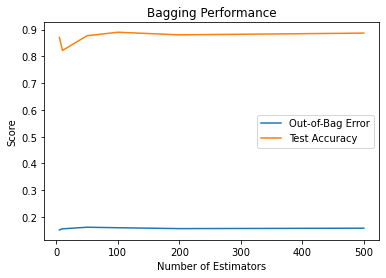

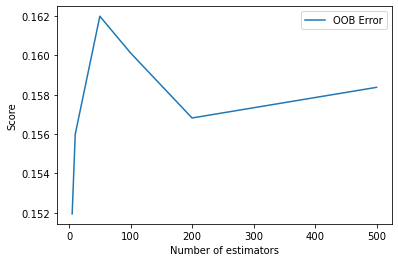

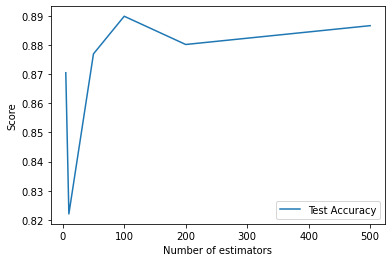

In [10]:
run_bagging()

- as the number of estimators increase the out-of-bag error decreases  and The test accuaracy increases 

- In bagging, each estimator is trained on a different bootstrap sample, meaning they are trained on different subsets of the original dataset. This can involve using different features or different data points. As a result, the estimators are independent of each other.

- When the number of estimators in the bagging ensemble increases, the variance of the model decreases. This is because the predictions from multiple independent estimators are combined, which helps to reduce the overall variance of the model.

- As the variance decreases, the out-of-bag (OOB) error also decreases. OOB error is an estimate of the model's performance on unseen data and is calculated using the data points that were not included in the bootstrap sample for each estimator. With more estimators, the OOB error tends to become more accurate.

- Consequently, when the OOB error decreases, it indicates that the model is becoming more accurate. This decrease in error translates to an increase in accuracy on the test data, as the model is better able to generalize to unseen samples.

-**conclusion** : by using bagging and increasing the number of estimators, we can reduce the model's variance, decrease the OOB error, and improve the accuracy of the model on test data . 

## AdaBoost from Scratch

In [11]:
class GenericBoosting:

    def __init__(self, n_estimators):
        self.n_estimators = n_estimators

    def create_estimator(self):
        # create a decision stump as a weak estimator
        return DecisionTreeClassifier(max_depth=1, random_state=0)

    def fit_and_predict(self, X_train, Y_train, X_test, Y_test):
        # apply AdaBoost on weak estimators
        
        ## initialize the training and test data with empty array placeholders
        pred_train = np.empty((self.n_estimators, X_train.shape[0]))
        pred_test = np.empty((self.n_estimators, X_test.shape[0]))

        ######################
        Y_train = Y_train.astype(int)
        Y_train = np.where(Y_train == 0, -1, 1)
        Y_test = Y_test.astype(int)
        Y_test = np.where(Y_test == 0, -1, 1)
        ######################
        
        # initialize weights
        W = np.ones((X_train.shape[0],)) / X_train.shape[0]

        # loop over the boosting iterations 
        for idx in range(self.n_estimators): 

            # create and fit a new decision stump
            model = self.create_estimator().fit(X_train, Y_train, sample_weight=W)

            # predict classes for the training data and test data
            pred_train_idx = model.predict(X_train)
            pred_test_idx = model.predict(X_test)

            # TODO: calculate the miss Indicator
            miss_indicator =  pred_train_idx != Y_train

            # TODO: calculate the error for the current classifier
            cls_err =  np.sum(W * miss_indicator) / np.sum(W)

            # TODO: calculate current classifier weight
            cls_alpha =0.5 * np.log((1 - cls_err) / cls_err)

            # TODO: update the weights 
            W =  W * np.exp(-cls_alpha * Y_train * pred_train_idx)

            # TODO: add to the overall predictions
            pred_train[idx] = cls_alpha * pred_train_idx
            pred_test[idx] = cls_alpha * pred_test_idx

            # normalize weights 
            W = W / np.sum(W)

        # TODO: return accuracy on train and test sets
        train_accuracy = np.mean(np.sign(np.sum(pred_train, axis=0)) == Y_train)
        test_accuracy = np.mean(np.sign(np.sum(pred_test, axis=0)) == Y_test)
        
        return train_accuracy, test_accuracy

In [12]:
def get_scores(n_estimators):
    # run model boosting and compute train and test accuracy
    model = GenericBoosting(n_estimators=n_estimators)
    train_accuracy, test_accuracy = model.fit_and_predict(X_train, y_train, X_test, y_test)
    return train_accuracy, test_accuracy

In [13]:
def run_boosting():
    n_estimators_options = [5, 10, 50, 100, 200, 500]
    train_accuracies = []
    test_accuracies = []
    for n_estimators in n_estimators_options:
        train_accuracy, test_accuracy = get_scores(n_estimators)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    # TODO: plot the output scores against n_estimators
     # Plot the output scores against n_estimators
    plt.plot(n_estimators_options, train_accuracies, label='Train Accuracy')
    plt.plot(n_estimators_options, test_accuracies, label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title('AdaBoost Performance')
    plt.legend()
    plt.show()

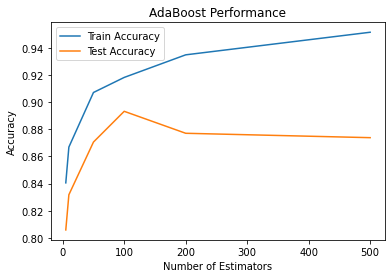

In [14]:
run_boosting()

- As we increase the number of estimators in the ensemble, we typically observe an increase in the training accuracy. This is because each subsequent estimator in the ensemble learns from the mistakes made by the previous estimators. By learning from these mistakes, the ensemble becomes more adept at fitting the training data.

- However, when it comes to the test accuracy, we may notice a different trend. Initially, as we increase the number of estimators, the test accuracy tends to improve as well. This is because the ensemble benefits from the collective knowledge of multiple estimators, resulting in better generalization to unseen data.

- However, there is a point where further increasing the number of estimators can lead to a decrease in test accuracy. This decline occurs because the model starts to overfit the training data as it becomes more complex. Overfitting means that the model becomes too specialized in capturing the idiosyncrasies of the training data, thus losing its ability to generalize well to new, unseen data.

- Therefore, there is a trade-off involved in selecting the number of estimators. While increasing the number of estimators can improve the training accuracy and initially enhance the test accuracy, there is a limit beyond which the test accuracy starts to decline due to overfitting. It is crucial to find the right balance between model complexity and generalization to achieve the best overall performance on unseen data.

- in this lab the best number of estimators to use in boosting is 100